<a href="https://colab.research.google.com/github/buithanhdam/ML23_KaggleProjectTitanic/blob/main/ML23_KaggleProjectTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Machine Learning Titanic using Kaggle 2023 by buithanhdam**

In [37]:
# Libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

# connect gg drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/Titanic'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/Titanic


#1 **Data evaluation**





- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex
- Age	Age in years
- sibsp	# of siblings / spouses aboard the Titanic
- parch	# of parents / children aboard the Titanic
- ticket	Ticket number
- fare	Passenger fare
- cabin	Cabin number
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes:
1. pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
3. sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
4. parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:

train_df = pd.read_csv('train.csv',index_col='PassengerId')
test_df = pd.read_csv('test.csv',index_col='PassengerId')

print(train_df.columns)
print(test_df.columns)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [8]:
print('shape of train set: ',train_df.shape)
print('shape of test set: ',test_df.shape)

shape of train set:  (891, 11)
shape of test set:  (418, 10)


In [7]:
train_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [12]:
test_df.head(7)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


Text(0.5, 1.0, 'Distribution of Missing Values')

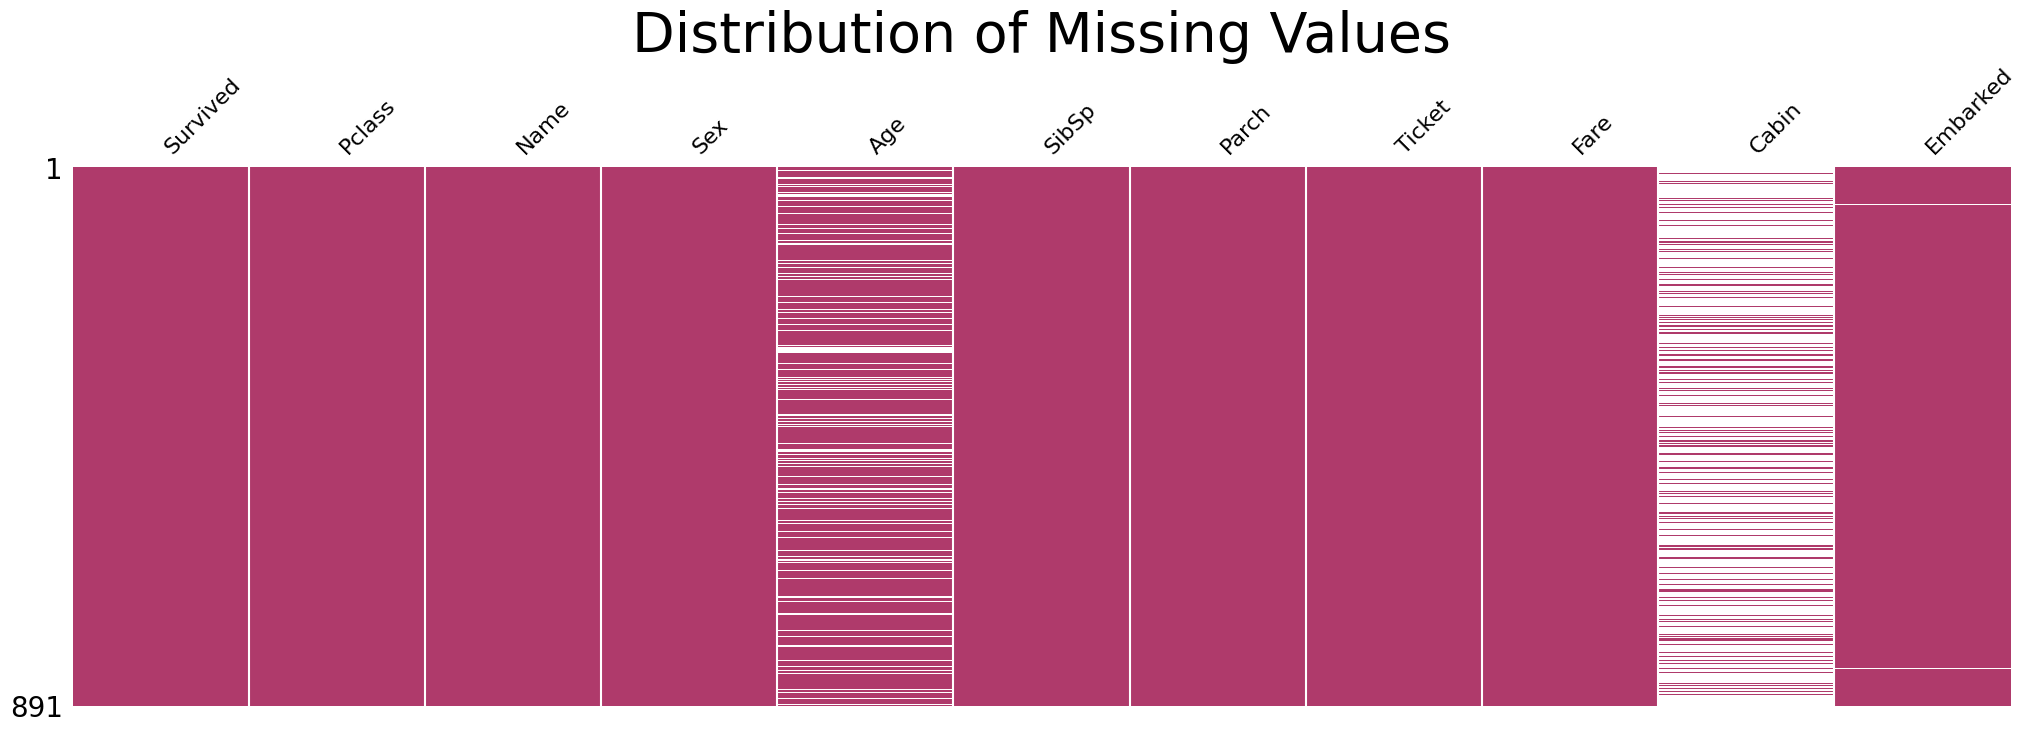

In [9]:

msno.matrix(train_df, sparkline=False, figsize=(25,7), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

#2 **Feature classification**


1.   Catgorical
2.   Numerical



In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


**Feature classification**

- Catgorical:
`Survived (train_set)`,
`Pclass`,
`Sex`,
`Embarked`,
`SibSp`,
`Parch`,
- Numerical:
`Age`,
`Fare`
- Mix:
`Cabin`, `Ticket`
- Error/Typo: `Name`
- Missing values (NaN, Null):
1. Train_set: `Cabin` > `Age` > `Embarked`
2. Test_set: `Cabin` > `Age` > `Fare`
- Type of values: String,Int64,Float64

##2.1 **Change features type**

In [25]:
# change Survived type (Train set)
train_df["Survived"] = train_df["Survived"].astype("category")

In [26]:
# create a function to change feature type of train and test set


features = ["Pclass","Sex","Embarked","SibSp","Parch"]
def change_type(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")
change_type(train_df,features)
change_type(test_df,features)

**Result**

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


##2.2 **Distribution of Numerical features**

In [29]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [30]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


#3 **Data Analysis (EDA)**

## **3.1 Correlating categorical features**
- Catgorical: `Survived` (train_set), `Pclass`, `Sex`, `Embarked`, `SibSp`, `Parch`

### **Target values: `Survived`**

In [33]:
train_df["Survived"].value_counts().to_frame()
# 0 = No
# 1 = Yes

,Survived
0,549
1,342


In [34]:
train_df["Survived"].value_counts(normalize=True).to_frame()
# 61.6162% = No = 0
# 38.3838% = Yes = 1

,Survived
0,0.616162
1,0.383838


***Only 38% survival , this is data imbalance but it is not severse so it dont need to use technique like sampling to tackle the imbalance***

### **Sex**

In [35]:
train_df["Sex"].value_counts().to_frame()


,Sex
male,577
female,314


In [36]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

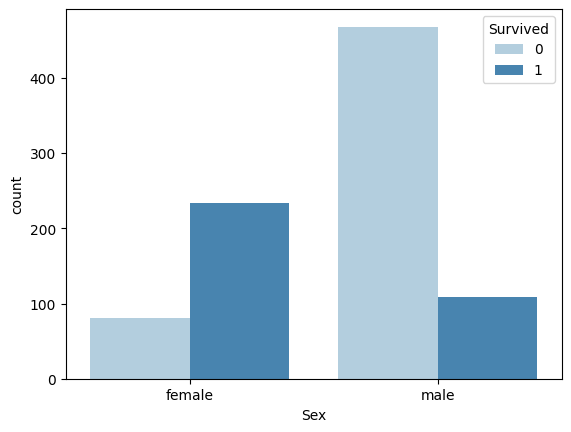

In [39]:
# relationship of sex and survived
sb.countplot(data=train_df, x="Sex", hue="Survived" , palette="Blues")